In [23]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline 
#This allows visuals to appear below the code.

In [25]:
from datetime import datetime

In [26]:
symbols = ["GM", "MCD", "KO", "SONY"] 
#General Motors, McDonalds, Coca-Cola co, & Sony Group Corp
start_date = datetime(2021, 1, 1)
end_date = datetime.today()
stock_data = web.get_data_yahoo(symbols, start_date, end_date)
print(stock_data.head())
#print(.head()) To check is everything is working fine.

Attributes  Adj Close                                         Close  \
Symbols            GM         MCD         KO        SONY         GM   
Date                                                                  
2021-01-04  40.509998  207.786865  51.933163  100.070000  40.509998   
2021-01-05  41.660000  209.032272  51.362255  103.110001  41.660000   
2021-01-06  42.980000  208.557831  49.728271  101.080002  42.980000   
2021-01-07  43.320000  209.526489  49.177044  102.000000  43.320000   
2021-01-08  43.060001  213.371475  50.279495  103.989998  43.060001   

Attributes                                          High              ...  \
Symbols            MCD         KO        SONY         GM         MCD  ...   
Date                                                                  ...   
2021-01-04  210.220001  52.759998  100.070000  42.119999  214.720001  ...   
2021-01-05  211.479996  52.180000  103.110001  41.840000  211.949997  ...   
2021-01-06  211.000000  50.520000  101.080002 

In [27]:
print(stock_data['Adj Close'])

Symbols            GM         MCD         KO        SONY
Date                                                    
2021-01-04  40.509998  207.786865  51.933163  100.070000
2021-01-05  41.660000  209.032272  51.362255  103.110001
2021-01-06  42.980000  208.557831  49.728271  101.080002
2021-01-07  43.320000  209.526489  49.177044  102.000000
2021-01-08  43.060001  213.371475  50.279495  103.989998
...               ...         ...        ...         ...
2021-08-24  49.570000  238.429993  56.009998  104.110001
2021-08-25  49.700001  238.830002  56.070000  105.349998
2021-08-26  48.619999  236.949997  55.540001  101.650002
2021-08-27  49.799999  237.479996  55.650002  103.250000
2021-08-30  49.169998  236.589996  56.180000  102.459999

[166 rows x 4 columns]


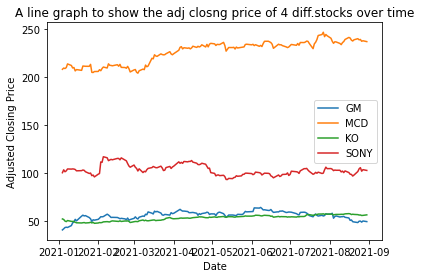

In [30]:
#note: stock_data is a dataframe
stock_data = stock_data.reset_index()
x_values = stock_data['Date']
y_values = stock_data['Adj Close']
plt.plot(x_values, y_values)
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("A line graph to show the adj closng price of 4 diff.stocks over time")
plt.legend(['GM', 'MCD', 'KO', 'SONY'])
plt.show()

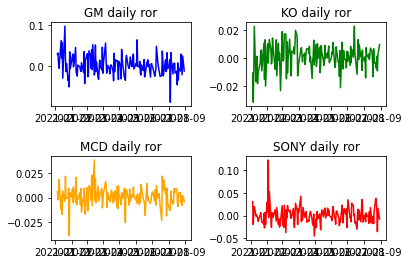

In [36]:
#Now we will calc. and show the daily rate of return
daily_returns = stock_data['Adj Close'].pct_change()
x_values = stock_data['Date']
plt.subplot(2, 2, 1)
plt.plot(x_values, daily_returns['GM'], color="blue")
plt.title("GM daily ror")
plt.subplot(2, 2, 2)
plt.plot(x_values, daily_returns['KO'], color="green")
plt.title("KO daily ror")
plt.subplot(2, 2, 3)
plt.plot(x_values, daily_returns['MCD'], color="orange")
plt.title("MCD daily ror")
plt.subplot(2, 2, 4)
plt.plot(x_values, daily_returns['SONY'], color="red")
plt.title("SONY daily ror")
plt.subplots_adjust(wspace=0.4, hspace=0.6)

Symbols
GM      0.000638
MCD     0.000095
KO      0.000081
SONY    0.000360
dtype: float64


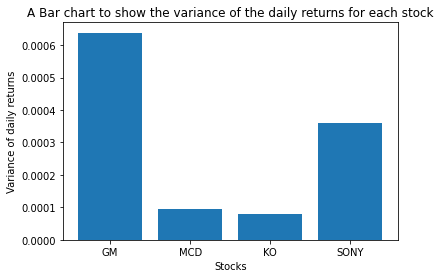

In [41]:
#Variance measures the risk of an asset. The larger the variance, the more unpredictable the returns of the asset.
daily_returns_var = daily_returns.var()
print(daily_returns_var.head())

height = []
for key in daily_returns_var.keys():
    height.append(daily_returns_var[key])
   
x_values = np.arange(len(daily_returns_var.keys()))

plt.bar(x_values, height)
plt.xticks(x_values, daily_returns_var.keys())
plt.title("A Bar chart to show the variance of the daily returns for each stock")
plt.xlabel("Stocks")
plt.ylabel("Variance of daily returns")
plt.show()
    


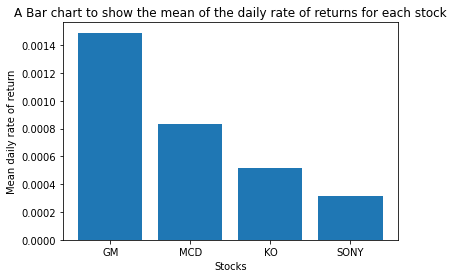

In [43]:
#Code to show the mean of the daily rate of returns
GM_mean_ror = daily_returns["GM"].mean()
MCD_mean_ror = daily_returns["MCD"].mean()
KO_mean_ror = daily_returns["KO"].mean()
SONY_mean_ror = daily_returns['SONY'].mean()

y_values = [GM_mean_ror, MCD_mean_ror, KO_mean_ror, SONY_mean_ror]
x_values = ["GM", "MCD", "KO", "SONY"]
plt.bar(x_values, y_values)
plt.title("A Bar chart to show the mean of the daily rate of returns for each stock")
plt.ylabel("Mean daily rate of return")
plt.xlabel("Stocks")
plt.show()

In [44]:
#CoVariance - when we quantify the risk of an portfolio, we must calculate the CoVariance between each asset.
cov_of_returns = daily_returns.cov()
print(cov_of_returns.head())


Symbols        GM       MCD        KO      SONY
Symbols                                        
GM       0.000638  0.000045  0.000010  0.000127
MCD      0.000045  0.000095  0.000048  0.000047
KO       0.000010  0.000048  0.000081  0.000036
SONY     0.000127  0.000047  0.000036  0.000360


In [48]:
print("CoVariance - None of the stocks are negatively correlated. General Motors and Sony have the highest correlation, whilst Coca-Cola and General Motors have the lowest correleation. Which is close to zero. This is good, as the only way you reduce the risk in a portfolio, is to have stocks that are not correleated at all i.e Cov of 0.")
print("")
print("Variance - GM has the highest Variance which makes it the most risky. This makes for a balanced portfolio as McDonalds, and Coco-Cola stocks are generally low risk assets.")
print("")
print("Mean daily rate of return - GM has the highest average daily rate of return, which justifies it's risk/variance.")

CoVariance - None of the stocks are negatively correlated. General Motors and Sony have the highest correlation, whilst Coca-Cola and General Motors have the lowest correleation. Which is close to zero. This is good, as the only way you reduce the risk in a portfolio, is to have stocks that are not correleated at all i.e Cov of 0.

Variance - GM has the highest Variance which makes it the most risky. This makes for a balanced portfolio as McDonalds, and Coco-Cola stocks are generally low risk assets.

Mean daily rate of return - GM has the highest average daily rate of return, which justifies it's risk/variance.
